<a id="0"></a> <br>
# Introduction 
* In this kernel, we will learn the basics of sound theory, how to use **librosa**, sound waves and training neural networks with sound.

<img src = "https://t3.ftcdn.net/jpg/03/68/44/46/360_F_368444653_m1NG6V8BGo9vSDXk8ClHWIHKyfzOpU4S.jpg" />

* We will use [Freesound General-Purpose Audio Tagging Challenge](https://www.kaggle.com/c/freesound-audio-tagging) dataest for this kernel.

<img src = "https://upload.wikimedia.org/wikipedia/commons/3/3c/Freesound_project_website_logo.png" />
 
### Thanks to This Great Channel: https://www.youtube.com/channel/UCZPFjMe1uRSirmSpznqvJfQ 
 
## Content
* [Imports](#1)
* [What is Sound](#2)
    * [What is Waveform](#2.1)
    * [Simple Sine Wave](#2.2)
        * [Coding Simple Sine Wave](#2.21)
    * [Pitch](#2.3)
        * [MIDI Notes](#2.31)
        * [Coding Mapping Pitch to Frequency](#2.32)
    * [Complex Waves (Multiple sine waves)](#2.4)
        * [Coding Complex Waves](#2.41)
* [Analyzing Sound Data](#3)
    * [Converting Analog Signal to Digital Signal](#3.1)
    * [Preparing Files](#3.2)
    * [Analyzing](#3.3)
    * [Signal Domains](#3.4)
        * [Fast Fourier Transform (FFT)](#3.41)
        * [Spectrogram](#3.42)
    * [MFCCs](#3.5)
* [Deep Learning with Audio](#4)
    * [Preparing Data](#4.1)
    * [ANN](#4.2)
        * [Results](#4.21)
    * [CNN](#4.3)
        * [Results](#4.31)
* [Conclusion](#5)

<a id="1"></a> <br>
# Imports
[Back to Introduction](#0)

* **librosa** is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems.

<img src = "https://user-images.githubusercontent.com/1190540/61129980-a5bfeb00-a483-11e9-8fee-38eb02d802f4.png" />

In [ ]:
# data analysis and visualization
import numpy as np 
import pandas as pd 
import librosa 
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
import IPython.display as ipd
from scipy.io import wavfile
import glob

# keras and scikitlearn/deep learning
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense, Dropout, Input, ReLU, LeakyReLU, BatchNormalization
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<a id="2"></a> <br>
# What is Sound
[Back to Introduction](#0)

* In physics, sound is a vibration that propagates as an acoustic wave, through a transmission medium such as a gas, liquid or solid. [**Reference**](https://en.wikipedia.org/wiki/Sound)

* When we are talking we are generating sound waves and these waves have **compressions** and **rarefactions**.

<img src = "https://www.researchgate.net/profile/Adi_Singh/publication/334784649/figure/fig2/AS:786638879875074@1564560732699/Pressure-propagation-of-a-sound-wave-through-air.ppm" />

<a id="2.1"></a> <br>
## What is Waveform
[Back to Introduction](#0)

* We will learn 2 types of waveforms: **Simple(single sinewaves)** and **Complex(multiples sinewaves)**.

<a id="2.2"></a> <br>
## Simple Sine Wave
[Back to Introduction](#0)

* Sine wave is the simplest form of wave.

<img src = "https://www.investopedia.com/thmb/o2tPuXZxDRHAPn-VtLuQLX3IALQ=/980x650/filters:no_upscale():max_bytes(150000):strip_icc()/dc-vs-ac-alternating-current-sine-wave-waveform-5b74a6e146e0fb005063fb8e.png" width = "600" height = "360" />

* **Let's look at the features of sine wave:**


1.  **Period:** Period is the distnace between 2 peaks. Showing with **T**.
1.  **Frequency:** Frequency is the reverse of period (1/T [T is period] ). Expressed in **Hz**. Showing with **f**.
1.  **Amplitude:** How high perturbation in air pressure goes. If it is higher then amplitude is higher too. Showing with **A**. **Note:** Larger amplitude = louder 
1.  **Phase:** The first peak of waves crest's time. Showing with **φ**.

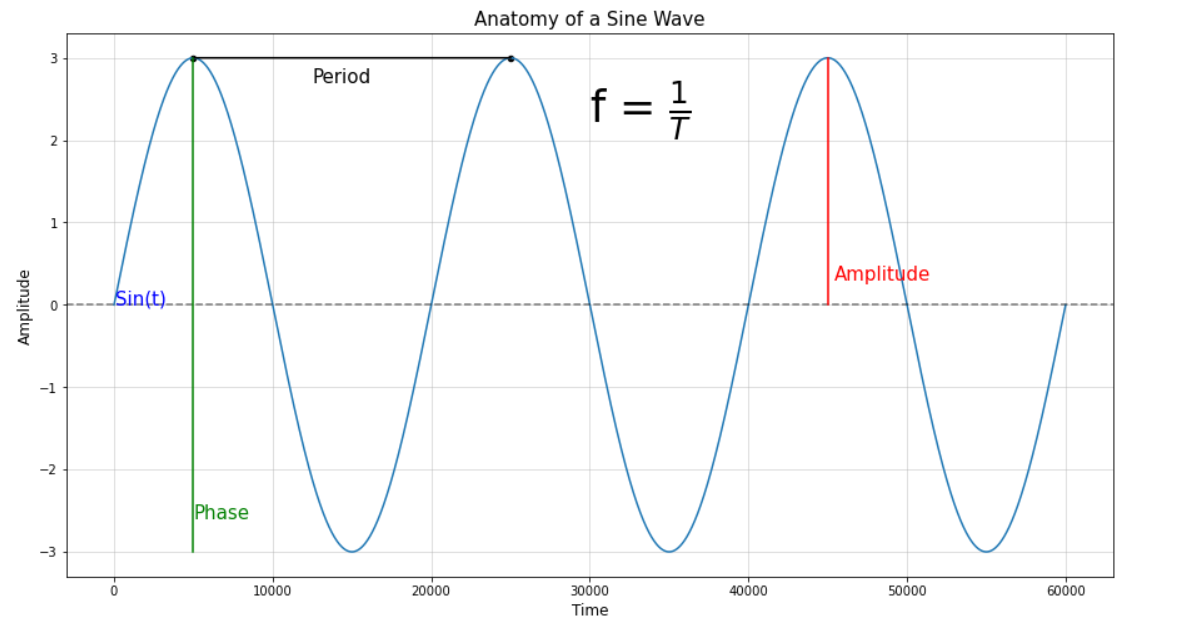

* **Frequency and amplitude comparisons:**

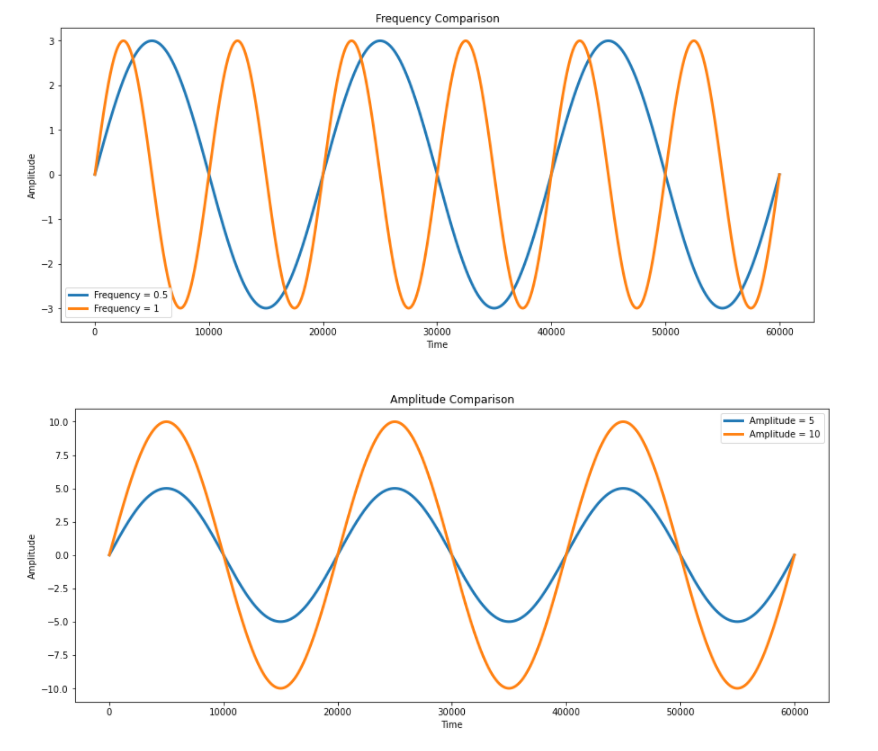

     
* **Formula of a sine wave:**

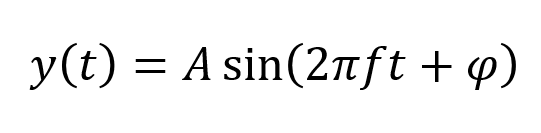

<a id="2.21"></a> <br>
### Coding Simple Sine Waves
[Back to Introduction](#0)

In [ ]:
def sine_wave(amp, freq, time, phase):
    
    y_list = []
    for t in (time):
        y = amp * np.sin(2 * np.pi * freq * t + phase)
        y_list.append(y)
        
    return np.array(y_list)

wave = sine_wave(3, .5, np.arange(0,6, 0.0001), 0)

plt.figure(figsize = (15,8))
plt.plot(wave, label = "Sine Wave")
plt.legend()
plt.show()

* **Not that necessary, but here is how cosine wave look like:**

In [ ]:
def cos_wave(amp, freq, time, phase):
    
    y_list = []
    for t in (time):
        y = amp * np.cos(2 * np.pi * freq * t + phase)
        y_list.append(y)
        
    return np.array(y_list)

s_wave = sine_wave(3, 0.5, np.arange(0,6, 0.0001), 0)
c_wave = cos_wave(3, 0.5, np.arange(0,6, 0.0001), 0) 

plt.figure(figsize = (15,8))
plt.plot(s_wave, label = "Sine Wave")
plt.plot(c_wave, label = "Cosine Wave")
plt.text(100, c_wave[0], "Cos", fontsize=15, color = "orange")
plt.text(100, s_wave[0], "Sin", fontsize=15, color = "blue")
plt.legend()
plt.show()

<a id="2.3"></a> <br>
## Pitch
[Back to Introduction](#0)

* We do not perceive frequency in a linear way, we percieve frequency in a **logarithmic** way.

<a id="2.31"></a> <br>
### MIDI Notes
[Back to Introduction](#0)

* Before pitch we have to understand **MIDI Notes**. MIDI is a way to represent notes as numbers. 

<img src = "https://www.researchgate.net/profile/Mickael_Tits/publication/283460243/figure/fig8/AS:614346480685058@1523483023512/88-notes-classical-keyboard-Note-names-and-MIDI-numbers.png" />


* If you look at the keyboard you can see a pattern that repeats itself. That pattern named **octave**.

<img src = "https://i.pinimg.com/564x/4b/49/76/4b49761d88f731777f8d381048c21382.jpg" />

* In an ocatve there are **12 notes**. In every octave (12 notes) **frequency doubles**.  

<img src = "https://i.pinimg.com/564x/0b/c9/d2/0bc9d2ef15da3231ebda88c7d3f77f9c.jpg" />

* **Mapping pitch to frequency formula:**

<img src = "https://i.pinimg.com/564x/7f/9c/b6/7f9cb64ca29feb1366667809cc925681.jpg" />

<a id="2.32"></a> <br>
### Coding Mapping Pitch to Frequency
[Back to Introduction](#0)


In [ ]:
def pitch_to_frequency(p):
    
    freqs = []
    
    for i in p:
        f = 2**(((i-69)/12))*440
        freqs.append(f)
    
    return freqs

pitches = np.arange(21, 105, 0.001) # 21, 33, 45, 57, 69, 81, 93, 105
freqs = pitch_to_frequency(pitches)

plt.figure(figsize = (15,8))
plt.plot(freqs, pitches)
plt.grid(alpha = 0.6)
plt.ylabel("Pitch")
plt.xlabel("Frequency")
plt.title("Mapping Pitch to Frequency")
plt.show()

<a id="2.4"></a> <br>
## Complex Waves (Multiple sine waves)
[Back to Introduction](#0)

* Complex waves are made of multiple waves. 

<img src = "https://i.pinimg.com/564x/1f/4e/5c/1f4e5c1e237f440bd1f28fa4a1072c34.jpg" />

* In complex waves if peaks overlap in new wave the amplitude increases. If a peak and a dip overlap then they cancel eachother. 

<img src = "https://i.pinimg.com/564x/d9/a6/90/d9a690e7d21f248c6a6372c66b732561.jpg" />

* **Formula of multiple sine waves:**

<img src = "https://i.pinimg.com/564x/3b/c5/17/3bc517df791f362173902b1fb4fed37a.jpg" />

<a id="2.41"></a> <br>
### Coding Complex Waves
[Back to Introduction](#0)

In [ ]:
s1 = sine_wave(2,0.8, np.arange(0,6,0.0001), 0)
s2 = sine_wave(2,2, np.arange(0,6,0.0001), 0)
s3 = sine_wave(2,4, np.arange(0,6,0.0001), 0)

s1, s2, s3 = np.array(s1), np.array(s2), np.array(s3) 

plt.figure(figsize = (15,8))

ax1 = plt.subplot2grid((2, 3), (0, 0), colspan=1)
ax2 = plt.subplot2grid((2, 3), (0, 1), colspan=1)
ax3 = plt.subplot2grid((2, 3), (0, 2), colspan=1)
ax4 = plt.subplot2grid((2, 3), (1, 0), colspan=3)

ax4.plot(s1 + s2 + s3, color = "red")
ax4.set_title("Waves Added (Complex wave)")

ax1.plot(s1)
ax1.set_title("Wave 1")

ax2.plot(s2, color = "orange")
ax2.set_title("Wave 2")

ax3.plot(s3, color = "green")
ax3.set_title("Wave 3")

plt.show()

* **Canceling Waves:**

In [ ]:
s1 = sine_wave(2,0.8, np.arange(0,6,0.0001), 0)
s2 = sine_wave(2,0.8, np.arange(0,6,0.0001), 0)

s2 = np.array(s2)
 
reverser = np.full(
    shape=len(s2),
    fill_value=-1,
    dtype=np.int)

s2 = s2*reverser

plt.figure(figsize = (15,6))
plt.plot(s1, alpha = 0.4)
plt.plot(s2, alpha = 0.4)
plt.plot(s2 + s1, color = "black")
plt.title("Canceling Waves")
plt.show()

<a id="3"></a> <br>
# Analyzing Sound Data
[Back to Introduction](#0)

<a id="3.1"></a> <br>
## Converting Analog Signal to Digital Signal
[Back to Introduction](#0)

* In real world sound is **continuous**. But we cannot convert continuous things to digital because to do that we need infinite memory. So store analog signals as digital signals we are using a technique called **sampling**.

<img src = "https://i.pinimg.com/564x/3f/67/45/3f67455a50c245debc63e84b8d581f5b.jpg" />

* In sampling there is a term named **sampling rate**. Since analog waves are continuous we cannot get every sample of a analog wave (because there are infinite samples). So while converting them to digital we are taking samples from that wave using a certain period. You can define that period yourself but there is a common sampling rate: **44100 Hz**. If you go up or down you will face with deformations. In audio processing you can use sampling rates like 22050 or 16000 Hz. 

<a id="3.2"></a> <br>
## Preparing Files
[Back to Introduction](#0)

* In the dataset we have a csv file that shows files' labels(wich instrument) we will use that csv file for loading a spesific instrument's files.

In [ ]:
df = pd.read_csv("../input/freesound-audio-tagging/train.csv")
df.head()

* We will use **Saxophone** as a example instrument.

In [ ]:
df_saxophone = df[df["label"] == "Saxophone"]
df_saxophone.head()

* Loading files.

In [ ]:
files = []

for path in df_saxophone["fname"]: # we will use saxophone samples
    file, _ = librosa.core.load("../input/freesound-audio-tagging/audio_train/" + str(path), sr=44100) # 44100Hz in dataset
    files.append(file)

In [ ]:
sample = files[3] # the smaple file we will use

<a id="3.3"></a> <br>
## Analyzing
[Back to Introduction](#0)

* Let's listen to our sample.

In [ ]:
IPython.display.display(ipd.Audio(data = sample, rate = 44100)) # the original sample rate of recording

In [ ]:
reverser = np.full(
    shape=len(sample),
    fill_value=-1,
    dtype=np.int)


sample_xd = sample[::-1]

IPython.display.display(ipd.Audio(data = sample_xd, rate = 44100))

In [ ]:
plt.figure(figsize = (15, 8))
plt.plot(sample_xd)
plt.show()

* Let's play with the **sample rate** and see what is happening.

In [ ]:
sample_rates = [60000, 22050, 16000, 10000]

for sr in sample_rates:
    IPython.display.display(ipd.Audio(data = sample, rate = sr))

* As you can see our sample file's playing speed and time length changed.
* **Note:** Normally if sample rate is higher we should get a smoother result. But in this example our file recorded in 44100 Hz so when we change it we are facing with deformation (normally there is no sample rate limit in nature).

In [ ]:
plt.figure(figsize = (15, 8))
plt.plot(sample)
plt.show()

* **Zooming into the sample:**

In [ ]:
plt.figure(figsize = (20, 8))
plt.plot(sample[:500])
plt.plot(sample[:500], ".", color = "red")
plt.show()

* As you can see this is a **complex wave**.

<a id="3.4"></a> <br>
## Signal Domains
[Back to Introduction](#0)

* There are 3 different domains for signal.


1. **Time Domain:** We saw that while analyzing the dataset. We have time on the x axis and amplitude on the y axis.
<img src = "https://www.projectrhea.org/rhea/images/7/7f/Time_audio.jpg" />

1. **Frequency Domain:** In frequency domain we have frequency on the x axis and magnitude on the y axis. To do that we are using a technique called **Fast Fourier Transform (FFT)**. 
<img src = "https://i.pinimg.com/564x/b0/e2/e9/b0e2e931b3a7c902f36cbcb44c833332.jpg" />

1. **Time-Frequency Domain:** As you can see we are loosing information both of these techniques. For all information we are using **Spectrograms**. To achive Spectrograms we use **Short Time Fourier Transform (STFT)**. In STFT we are taking just a small frame of signal. So after taking STFTs we are projecting them to ceate Spectrograms. In Spectrograms we have time on the x axis, frequency on the y axis and decibels as colors.
<img src = "https://i.pinimg.com/564x/ff/a8/c5/ffa8c50372187a3acba8b065b3f02926.jpg" />

<a id="3.41"></a> <br>
### Fast Fourier Transform (FFT)
[Back to Introduction](#0)

In [ ]:
fft = np.fft.fft(sample)

magnitude = np.abs(fft)
freq = np.linspace(0, 44100, len(magnitude))

plt.figure(figsize = (15, 8))
plt.plot(freq, magnitude)
plt.title("Fast Fourier Transform")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

* As you can see our FFT is **symetrical**. This is an issue of FFT so we can **cut the second half because we do not need it**. 

In [ ]:
left_freq = freq[:int(len(freq)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

plt.figure(figsize = (15, 8))
plt.plot(left_freq, left_magnitude)
plt.title("Fixed Fast Fourier Transform")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

* **Let's zoom in to our FFT:**

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (18,12))

ax[0].plot(left_freq[:500], left_magnitude[:500])
ax[0].set_title("FFT Zoom: 0-500")
ax[0].set_ylabel("Magnitude")

ax[1].plot(left_freq[1000:1500], left_magnitude[1000:1500])
ax[1].set_title("FFT Zoom: 1000-1500")
ax[1].set_ylabel("Magnitude")

ax[2].plot(left_freq[5000:5500], left_magnitude[5000:5500])
ax[2].set_title("FFT Zoom: 5000-5500")
ax[2].set_xlabel("Frequency")
ax[2].set_ylabel("Magnitude")

plt.show()

<a id="3.42"></a> <br>
### Spectrogram
[Back to Introduction](#0)

In [ ]:
n_fft = 2048
hop_length = 512

stft = librosa.core.stft(sample, hop_length = hop_length, n_fft = n_fft)
spectrogram = np.abs(stft)

plt.figure(figsize = (15,8))
librosa.display.specshow(spectrogram, sr = 44100, hop_length = hop_length)
plt.title("Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

* As you can see most of the spectogram colored with black (low decibels). The reason of that is we do not perceive sound in a **linear** way as we plotted but in a **logarithmic** way. So let's code it again with log. 

In [ ]:
log_spectrogram = librosa.amplitude_to_db(spectrogram) # applying logarithm

plt.figure(figsize = (15,8))
librosa.display.specshow(log_spectrogram, sr = 44100, hop_length = hop_length)
plt.title("Log Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

<a id="3.5"></a> <br>
## MFCCs
[Back to Introduction](#0)

* **MFCC** is a complicated topic and we will not cover everything here but in machine learning it is very important. Briefly it enables us to distinguish different instruments easily. It has time on the x axis, **MFCC coefficents** on the x axis. Most of the time in machine learning we set the number of MFCCs to **13**.  

<img src = "https://i.stack.imgur.com/4TKqd.png" />

In [ ]:
MFCCs = librosa.feature.mfcc(sample, n_fft = n_fft, hop_length = hop_length, n_mfcc = 13)

plt.figure(figsize = (15,8))
librosa.display.specshow(MFCCs, sr = 44100, hop_length = hop_length)
plt.title("MFCCs")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficents")
plt.colorbar()
plt.show()

<a id="4"></a> <br>
# Deep Learning with Audio
[Back to Introduction](#0)

* In our dataset there are samples that are taken from different instruments. We will choose 10 different instruments and train different models.

<img src = "https://miro.medium.com/max/1866/0*AONVmd3v4wO_dWr6" />

<a id="4.1"></a> <br>
## Preparing Data
[Back to Introduction](#0)

In [ ]:
print(df.label.unique())
print("Number of Instruments: ", len(df.label.unique()))

* There are **41** different instruments we will use: **Hi-hat, Trumpet, Cello, Clarinet, Snare_drum, Flute, Bass_drum, Electric_piano, Acoustic_guitar and Violin_or_fiddle**.

In [ ]:
DURATION = 4
SAMPLE_RATE = 16000
AUDIO_SHAPE = SAMPLE_RATE*DURATION

# Path
DATASET_PATH = "../input/freesound-audio-tagging/"

# Load 
def load_train_data(label, input_length=AUDIO_SHAPE):
    train = pd.read_csv(DATASET_PATH + "train.csv")
    if label != None:
        train_list = train.loc[train.label == label]
    else: 
        train_list = train
    cur_batch_size = len(train_list)
    train_fname_list = train_list.fname
    X = np.empty((cur_batch_size, input_length))
    for i, train_fname in enumerate(train_fname_list):
        file_path = DATASET_PATH + "audio_train/" + train_fname
        
        # Read and Resample the audio
        data, _ = librosa.core.load(file_path, sr=SAMPLE_RATE, res_type='kaiser_fast')

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, input_length - len(data) - offset), "constant")
        X[i,] = data
    print("{} Files Loaded".format(label))
    return X

def normalization(X):
    mean = X.mean(keepdims=True)
    std = X.std(keepdims=True)
    X = (X - mean) / std
    return X

# Rescale Data to be in range [rangeMin, rangeMax]
def rescale(X, rangeMin=-1, rangeMax=+1):
    maxi = X.max()
    mini = X.min()
    X = np.interp(X, (mini, maxi), (rangeMin, rangeMax))
    return X

In [ ]:
instruments = ["Hi-hat", "Trumpet", "Cello", "Clarinet", "Snare_drum", "Flute", "Bass_drum", "Electric_piano", "Acoustic_guitar", "Violin_or_fiddle"]

X_train = []
Y_train = []

for label, instrument in enumerate(instruments, start = 0):
    
    x = load_train_data(instrument)
    x = normalization(x)
    x = rescale(x)
            
    for file in x:
        
        X_train.append(file)
        Y_train.append(label)

In [ ]:
print(len(X_train))
print(len(Y_train))

In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
fig = plt.figure(figsize = (12,8))
sns.countplot(Y_train,palette = "Blues")
plt.title("Label Count")
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 42)

In [ ]:
y_train = to_categorical(y_train,num_classes = 10)
y_test = to_categorical(y_test,num_classes = 10)

In [ ]:
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

<a id="4.2"></a> <br>
## ANN
[Back to Introduction](#0)

* In first part we will use a standard ANN. As input we will give raw audio files.

<img src = "https://i.pinimg.com/564x/a7/ff/7b/a7ff7ba03e4afbfc0f571296c3e86a56.jpg" />

* If you do not know what is ANN you can check out this kernel: https://www.kaggle.com/mrhippo/data-science-notes5-deep-learning-ann

In [ ]:
model = Sequential()

model.add(Dense(512, kernel_regularizer = keras.regularizers.l2(0.001), input_shape = (x_train.shape[0], x_train.shape[1])))
model.add(ReLU())
model.add(Dropout(0.4))

model.add(Dense(256, kernel_regularizer = keras.regularizers.l2(0.001)))
model.add(ReLU())
model.add(Dropout(0.3))

model.add(Dense(64, kernel_regularizer = keras.regularizers.l2(0.001)))
model.add(ReLU())
model.add(Dropout(0.2))

model.add(Dense(10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

history = model.fit(x_train,y_train,epochs = 20, batch_size = 100,validation_data = (x_test,y_test))

<a id="4.21"></a> <br>
### Results
[Back to Introduction](#0)

In [ ]:
history.history.keys()

In [ ]:
plt.figure(figsize = (13,8))
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Accuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (13,8))
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"],label = "Validation Loss")
plt.title("Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

* As you can see our model is not that good and has overfitting. Next part we will train CNN on MFCCs.

<a id="4.3"></a> <br>
## CNN
[Back to Introduction](#0)

* In this part we will use CNN. We will give MFCCs of audios' as input.

<img src = "https://i.pinimg.com/564x/4a/50/a3/4a50a33b8a05b58a1e0edabdbb5df3a5.jpg" />

* If you do not know what is CNN you can check out this kernel: https://www.kaggle.com/mrhippo/data-science-notes6-deep-learning-cnn

In [ ]:
mfcc_train = []

for file in X_train:
    MFCCs = librosa.feature.mfcc(file, n_fft = n_fft, hop_length = hop_length, n_mfcc = 15)
    mfcc_train.append(MFCCs.T) 

In [ ]:
mfcc_train = np.array(mfcc_train)

In [ ]:
mfcc_train.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(mfcc_train, Y_train, test_size = 0.2, random_state = 42)

In [ ]:
y_train = to_categorical(y_train,num_classes = 10)
y_test = to_categorical(y_test,num_classes = 10)

In [ ]:
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

* **We have to add a 4th dimention for keras:**

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 126, 15, 1)
x_test = x_test.reshape(x_test.shape[0], 126, 15, 1)
print(x_train.shape)
print(x_test.shape)

In [ ]:
model = Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])))
model.add(keras.layers.MaxPool2D((3, 3), strides = (2, 2), padding = "same"))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(32, (3, 3), activation = "relu"))
model.add(keras.layers.MaxPool2D((3, 3), strides = (2, 2), padding = "same"))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(32, (3, 3), activation = "relu"))
model.add(keras.layers.MaxPool2D((3, 3), strides = (2, 2), padding = "same"))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.3))

model.add(Dense(10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

history = model.fit(x_train,y_train,epochs = 30, batch_size = 100,validation_data = (x_test,y_test))

<a id="4.31"></a> <br>
### Results
[Back to Introduction](#0)

In [ ]:
history.history.keys()

In [ ]:
plt.figure(figsize = (13,8))
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Accuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (13,8))
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"],label = "Validation Loss")
plt.title("Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

* You can increase accuracy by changing parameters.

<a id="5"></a> <br>
# Conclusion
[Back to Introduction](#0)

* **We learned how to process sound.**
* **If there is something wrong with this kernel please let me know in the comments.**

### Here is a notebook about generating audio with GANs: https://www.kaggle.com/mrhippo/audio-generation-with-simple-gans

### My other kernels: https://www.kaggle.com/mrhippo/notebooks

* **References:**
* https://www.youtube.com/playlist?list=PL-wATfeyAMNqIee7cH3q1bh4QJFAaeNv0
* https://www.kaggle.com/fizzbuzz/beginner-s-guide-to-audio-data
* https://github.com/rafalencar1997/Audio_Generation